# PHASE 1 Independent Project

## Overview ##

Microsoft wants to venture into creating original video content, their strategic plan includes creating a new movie studio. Before delving into the market, Microsoft wants to explore what types of films are currently doing the best at the box office. For this project, I will use exploratory data analysis to generate insights for Microsoft. Three data sets were used in this business problem. 
Interesting findings emerged during the analysis that can help Microsoft set up the studio. I was able to find the best-performing studio by domestic and foreign gross, the best-performing genres and market trends across the years.

### Loading the dataset before merging ###

In [274]:
# We want to import all the relevant libraries for data cleaning and visualization. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# loading the first dataset.
df1 =pd.read_csv("bom.movie_gross.csv.gz")

In [144]:
# Checking the columns of the first dataset.
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [145]:
# Loading the second dataset
df2 =pd.read_csv("imdb.title.basics.csv.gz")

In [146]:
# Checking the columns of the second dataset.
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [147]:
# Loading the third dataset
df3 =pd.read_csv("imdb.title.ratings.csv.gz")

In [148]:
# Checking the columns of the thrid dataset.
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


**Merging the dataset before data analysis**

In [149]:
# Let us merge df2 and df3 since the two dataset have the same columns 'tconst'
merged_df = df2.merge(df3, how="inner", on="tconst", validate="1:1")

In [150]:
# Rename the column title
df1= df1.rename(columns={"title": "primary_title"})

In [151]:
# We have now merged all the data from the three datasets. 
merged_df = pd.merge(df1, merged_df, how="right")

In [152]:
# After merging our data, we found (73858 columns and 12 rows) using the code merged_df.shape
merged_df.head()

,primary_title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,NaN,NaN,NaN,NaN,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,NaN,NaN,NaN,NaN,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,NaN,NaN,NaN,NaN,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,NaN,NaN,NaN,NaN,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,NaN,NaN,NaN,NaN,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


**Business Understanding**

The primary obejective of this analysis is to assist Microsoft who want to venture into creating original video content.This analysis will therefore help Microsoft understand the market, its potential competitors, what movies are doing well in the market, any potential correlations and the domestic and foreign gross earned by the various studios.  

## 1. Data Understanding ## 

***1.1: Information about our Dataset***

In [153]:
# To get the summary of the dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73858 entries, 0 to 73857
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73858 non-null  object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   float64
 5   tconst           73858 non-null  object 
 6   original_title   73858 non-null  object 
 7   start_year       73858 non-null  int64  
 8   runtime_minutes  66238 non-null  float64
 9   genres           73054 non-null  object 
 10  averagerating    73858 non-null  float64
 11  numvotes         73858 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 7.3+ MB


In [154]:
# We want to see the first few rows in our merged dataframe.  
merged_df.head()

,primary_title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,NaN,NaN,NaN,NaN,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,NaN,NaN,NaN,NaN,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,NaN,NaN,NaN,NaN,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,NaN,NaN,NaN,NaN,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,NaN,NaN,NaN,NaN,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


***1.2: Preview of our Dataset***

In [155]:
# We want to see the last rows in our merged dataframe.  
merged_df.tail(6)

,primary_title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73852,Jeg ser deg,NaN,NaN,NaN,NaN,tt9910930,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,7
73853,Padmavyuhathile Abhimanyu,NaN,NaN,NaN,NaN,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73854,Swarm Season,NaN,NaN,NaN,NaN,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5
73855,Diabolik sono io,NaN,NaN,NaN,NaN,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73856,Sokagin Çocuklari,NaN,NaN,NaN,NaN,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73857,La vida sense la Sara Amat,NaN,NaN,NaN,NaN,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


***1.3:Type of dataset***

In [156]:
# Check the tyoe of our data set
merged_df.dtypes

primary_title       object
studio              object
domestic_gross     float64
foreign_gross       object
year               float64
tconst              object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

***1.4: Summary dataset features***

In [157]:
merged_df.describe()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,3.005000e+03,3027.000000,73858.000000,66238.000000,73858.000000,7.385800e+04
mean,3.064033e+07,2014.077635,2014.276138,94.654428,6.332726,3.523584e+03
std,6.671629e+07,2.442245,2.614804,208.570981,1.474959,3.029362e+04
min,1.000000e+02,2010.000000,2010.000000,3.000000,1.000000,5.000000e+00
25%,1.390000e+05,2012.000000,2012.000000,81.000000,5.500000,1.400000e+01
50%,2.000000e+06,2014.000000,2014.000000,91.000000,6.500000,4.900000e+01
75%,3.250000e+07,2016.000000,2016.000000,104.000000,7.400000,2.820000e+02
max,7.001000e+08,2018.000000,2019.000000,51420.000000,10.000000,1.841066e+06


***1.5: To obtain the shape of the data***

In [158]:
# We want to see the dimension of the DataFrame. The DataFrame has 3027 rows and 13 columns.
merged_df.shape

(73858, 12)

*The data is well-suited for Microsoft. However, the data has several missing values which is a big limitation. Secondly, there are a few columns (tconst and 3 movie tiles (Primary_title, original_title and title) which may not be important in our analysis.*

## 2. Data Preparation ##

In [159]:
# I want to preserve the original dataset while working with a separate copy for cleaning and analysis. This will ensure that any changes made to the dataset I am working on will not affect the original merged data. 
cleaning_df = merged_df.copy()

**2.1 Changing the columns into lowercase and checking for unique values**

In [160]:
# Change the columns to lowercase
merged_df.columns = merged_df.columns.str.lower()
merged_df.columns

Index(['primary_title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'tconst', 'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [161]:
# Number of unique values
merged_df.nunique()

primary_title      69993
studio               216
domestic_gross      1522
foreign_gross       1006
year                   9
tconst             73856
original_title     71097
start_year            10
runtime_minutes      289
genres               923
averagerating         91
numvotes            7349
dtype: int64

In [256]:
# I noticed that the data type for foreign gross was object (refer to 1.3). Theerefore we need to change this into float for analysis purposes. 
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'])

In [258]:
# Let us confirm if it has cahnged. Yes the data type for foreign_gross has chnaged to float. 
merged_df.dtypes

primary_title       object
studio              object
domestic_gross     float32
foreign_gross      float64
year               float64
tconst              object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

***2.1:Handling Missing Values***

In [162]:
# Let us first check for the sum of missing values. There are very missing NaN entries. 
merged_df.isna().sum()

primary_title          0
studio             70834
domestic_gross     70853
foreign_gross      72026
year               70831
tconst                 0
original_title         0
start_year             0
runtime_minutes     7620
genres               804
averagerating          0
numvotes               0
dtype: int64

In [163]:
# Drop all rows containing missing values in the dataset.
merged_df.isna()

,primary_title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,False,True,True,True,True,False,False,False,False,False,False,False
1,False,True,True,True,True,False,False,False,False,False,False,False
2,False,True,True,True,True,False,False,False,False,False,False,False
3,False,True,True,True,True,False,False,False,True,False,False,False
4,False,True,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
73853,False,True,True,True,True,False,False,False,False,False,False,False
73854,False,True,True,True,True,False,False,False,False,False,False,False
73855,False,True,True,True,True,False,False,False,False,False,False,False
73856,False,True,True,True,True,False,False,False,False,False,False,False


In [164]:
# Finding the mean of the missing values. 
merged_df.isna().mean()*100

primary_title       0.000000
studio             95.905657
domestic_gross     95.931382
foreign_gross      97.519565
year               95.901595
tconst              0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317095
genres              1.088575
averagerating       0.000000
numvotes            0.000000
dtype: float64

The mean of the missing values is quite significant. 

In [165]:
# We have dropped all missing values. 
merged_df.dropna(inplace=True)

In [166]:
# Checking the sum of the dropped missing values. We have no missing values. 
merged_df.isna().sum()

primary_title      0
studio             0
domestic_gross     0
foreign_gross      0
year               0
tconst             0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

*I have removed all missing values which would have affected the data analysis* 

***2.2 Dealing with Duplicates***

In [167]:
# Check for any duplicates in the data.
merged_df.duplicated()

49       False
50       False
51       False
58       False
62       False
         ...  
68710    False
68857    False
69981    False
70890    False
72787    False
Length: 1767, dtype: bool

In [168]:
# Checking the sum of the missing values. 
merged_df.duplicated().sum()

0

*No duplicates found in the data.*

***2.3 Detecting outliers***

Text(0.5, 1.0, 'Microsoft data')

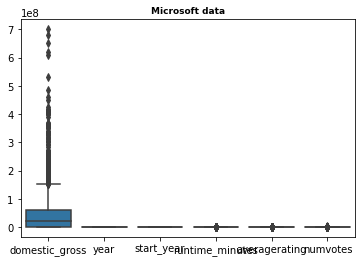

In [169]:
# Checking for outliers
sns.boxplot(data=merged_df)

plt.title('Microsoft data',fontsize=9, fontweight='bold')

C:\Users\User\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outliers in domestic_gross')

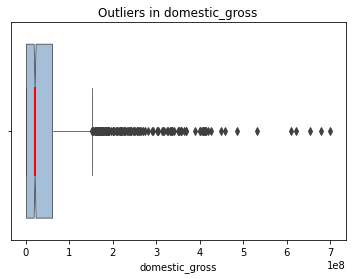

In [170]:
# There are outliers in domestic_gross
sns.boxplot(merged_df["domestic_gross"], 
            linewidth=.75,
            notch=True, 
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2})

plt.title("Outliers in domestic_gross")

In [171]:
#  Using the standard deviation
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
upper_limit, lower_limit = outlier_removal(merged_df, "domestic_gross")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  293113713.36116916
Lower Limit:  -192951656.10253873


## 3: Data analysis and Visualization ##

In [259]:
# Check the Domestic gross is by studio
merged_df["domestic_gross"] = pd.to_numeric(merged_df["domestic_gross"], downcast="float",)
domestic_gross_df_grouped_data = merged_df.groupby("studio")["domestic_gross"].sum().reset_index()
domestic_gross_df_grouped_data

,studio,domestic_gross
0,3D,6.100000e+06
1,A24,2.159776e+08
2,AF,2.000000e+06
3,AGF,1.580000e+04
4,AR,3.500000e+05
...,...,...
141,WOW,3.080000e+04
142,Wein.,1.570957e+09
143,Yash,2.444380e+07
144,Zee,1.100000e+06


3D studio has the highest domestic_gross in comparison to all the other Studios. 

In [266]:
# Check the Foreign gross is by studio
merged_df["foreign_gross"] = pd.to_numeric(merged_df["foreign_gross"], downcast="float",)
domestic_gross_df_grouped_data = merged_df.groupby("studio")["foreign_gross"].sum().reset_index()
domestic_gross_df_grouped_data

,studio,foreign_gross
0,3D,9.900000e+06
1,A24,1.952000e+08
2,AF,6.200000e+06
3,AGF,1.610000e+05
4,AR,5.770000e+07
...,...,...
141,WOW,1.860000e+04
142,Wein.,2.381222e+09
143,Yash,2.947607e+08
144,Zee,5.710000e+05


3D studio still has the highest foreign_gross in comparison to the other studios. 

In [261]:
# What the top most genres in the studios. Kindly note, we also want to drop any duplicates if there are any in that column. 

top_genres_watched = merged_df['genres'].value_counts().index[:5].drop_duplicates("genres").tolist()
top_genres_watched_counts = merged_df['genres'].value_counts().values[:5].tolist()

print("Top 5 Watched Genres:", top_genres_watched)
print("Counts:", top_genres_watched_counts)

Top 5 Watched Genres: ['Drama', 'Comedy,Drama', 'Adventure,Animation,Comedy', 'Comedy,Drama,Romance', 'Drama,Romance']
Counts: [115, 73, 72, 66, 61]


<ipython-input-220-55fdbe1d3914>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_genres_watched, rotation=90, zorder=100)


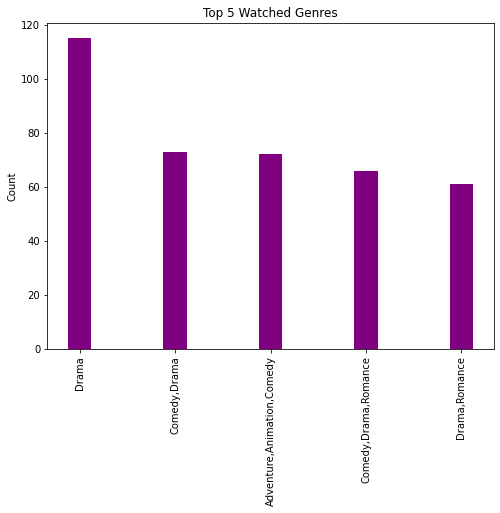

In [220]:
# Bar chart showing the top 5 watched genres
bar_chart_title = "Top 5 Watched Genres"

fig, ax = plt.subplots(figsize=(8, 6))
width = 0.25
ax.bar(top_genres_watched, top_genres_watched_counts, color='Purple', width=width)

ax.set_ylabel("Count")
ax.set_title(bar_chart_title, loc='center')  
ax.set_xticklabels(top_genres_watched, rotation=90, zorder=100)

plt.show()

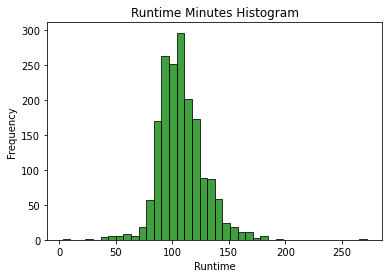

In [273]:
# Let us plot a histogram showing the most runtime movies with hist() function.
sns.histplot(merged_df["runtime_minutes"], bins=40, color='green', edgecolor='black')
    
# Adding labels and title
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Runtime Minutes Histogram')
plt.show()

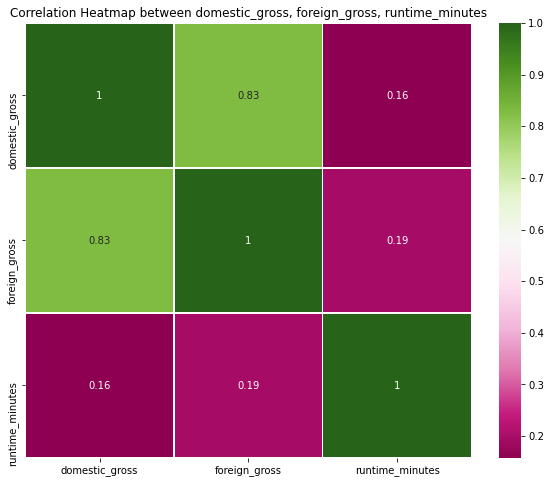

In [264]:
# let us see the corelation between domestic_gross, foreign_gross, runtime_minutes.
correlation_matrix = merged_df[['domestic_gross', 'foreign_gross', 'runtime_minutes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', linewidths=.5)
plt.title('Correlation Heatmap between domestic_gross, foreign_gross, runtime_minutes')
plt.show()

The heatmap displays the correlation between 'runtime_minutes' and ‘domestic_gross'. This shows that there is a weak positive correlation between 'domestic_gross' and 'runtime_minutes'.

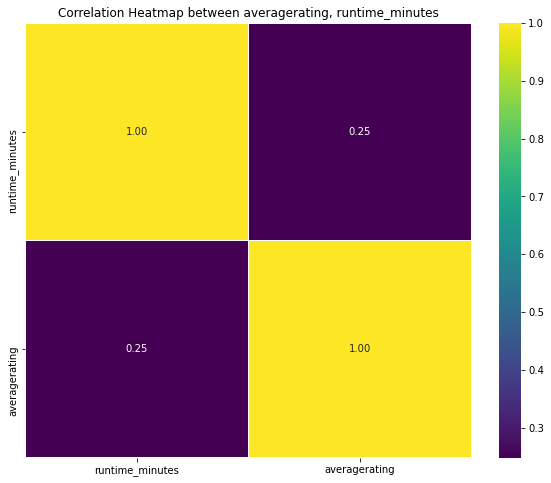

In [229]:
# Runtime Minutes and Average Rating: You can analyze if there's any correlation between the duration of the movies and their average rating.
correlation_matrix = merged_df[['runtime_minutes', 'averagerating']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between averagerating, runtime_minutes')
plt.show()

There is a weak positive correlation between runtime_minutes and averagerating. 

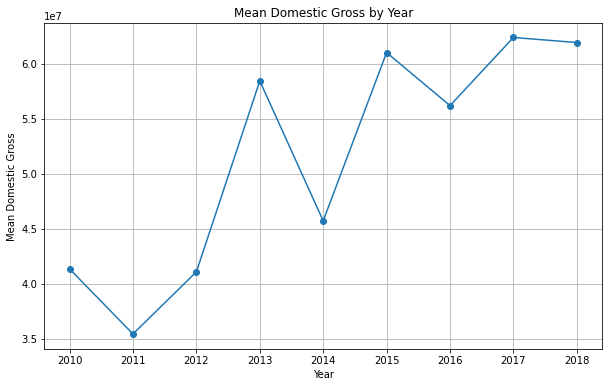

In [247]:
# Let us check how the domestic gross has been over the years. 
mean_domestic_gross_by_year = merged_df.groupby('year')['domestic_gross'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_domestic_gross_by_year.index, mean_domestic_gross_by_year.values, marker='o', linestyle='-')
plt.title('Mean Domestic Gross by Year')
plt.xlabel('Year')
plt.ylabel('Mean Domestic Gross')
plt.grid(True)
plt.show()

The domestic_gross increased since 2010, there was a sharp increase in domestic gross between 2011 and 2013. Then a decrease between 2013 and 2014. Nonetheless, the studios have experienced a good increase in domestic gross over the years. 

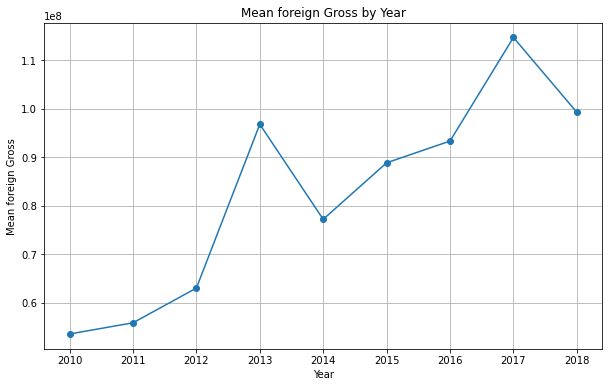

In [262]:
# Let us check how the domestic gross has been over the years. 
mean_domestic_gross_by_year = merged_df.groupby('year')['foreign_gross'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_domestic_gross_by_year.index, mean_domestic_gross_by_year.values, marker='o', linestyle='-')
plt.title('Mean foreign Gross by Year')
plt.xlabel('Year')
plt.ylabel('Mean foreign Gross')
plt.grid(True)
plt.show()

The foreign gross increased between 2010 and 2013. The foreign gross decreased between 2013 and 2014, then increased till 2017. 

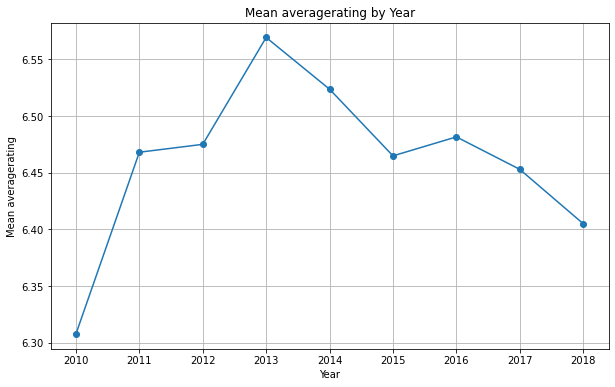

In [248]:
# Let us check how the domestic gross has been over the years. 
mean_domestic_gross_by_year = merged_df.groupby('year')['averagerating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_domestic_gross_by_year.index, mean_domestic_gross_by_year.values, marker='o', linestyle='-')
plt.title('Mean averagerating by Year')
plt.xlabel('Year')
plt.ylabel('Mean averagerating')
plt.grid(True)
plt.show()

It is interesting to note that the rating of the movies increased between 2010- 2013, then the rate averagerating started declining from 2013. 

## Conclusion ##

**This analysis leads to the following recommendations:**

**i) Focus on the Top Genres:** Since Drama is the most watched genre followed by Comedy-Drama, Adventure-Animation-Comedy, and Comedy-Drama-Romance, Miscrosoft should prioritize creating movies around these genres. Understanding audience preferences in these genres can help tailor movies to maximize viewership.

**ii. Monitor Domestic Gross and foreign gross Trends:** There was a sharp increase in domestic gross between 2011 and 2013. The domestic gross then increased from 2014 which suggests fluctuations in the market. Studios should closely monitor these trends and identify factors contributing to fluctuations. There was an increase in foreign gross between 2010 and 2013, followed by fluctuations. Microsoft should understand the political, economic, social, technological, legal and environmental factors of other countries. These factors affect the viewership of movies. For example, are certain movies banned in certain countries, and does the population of country B have internet access?    

**iii. Quality of the movies:** The observation that movie ratings increased between 2010 and 2013, followed by a decline, significantly highlights the importance of quality and understanding the needs of the viewers. Studios should prioritize producing high-quality content that resonates with the audience. Additionally, analyzing factors that have contributed to low ratings is important for improvement.

**iv. Benchmarking:** 3D Studio had the highest domestic and foreign gross in comparison to the other studios. Microsoft can use its movie studio data to assess the kind of movies mostly produced as a benchmark of creating its own movie studio. 

**Next Steps:**

•	Microsoft should continuously conduct market analysis and trends, to understand the needs of its audience.

•	The dataset showed that there was a great change in domestic and foreign gross and average rating between 2013 and 2014. Microsoft team needs to conduct further market research to nuance the causes of the changes in the market. This will help them understand the causes of market changes to be able to prepare for future shocks. 

•	After collecting all relevant data, Microsoft can create a new movie studio. 
